In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df= pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


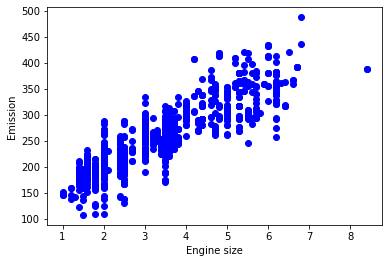

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

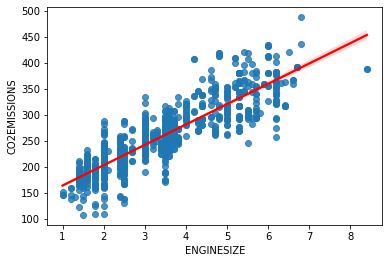

In [14]:
sns.regplot(x=cdf.ENGINESIZE, y=cdf.CO2EMISSIONS,line_kws={'color': 'red'})

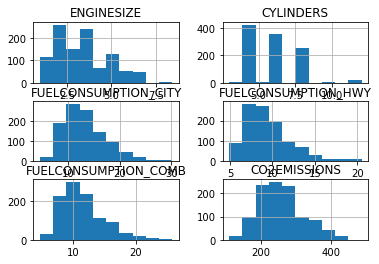

In [15]:
cdf.hist()
plt.show()

In [16]:
x_data = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y_data = cdf[['CO2EMISSIONS']]

In [17]:
x_train, x_test, y_train,y_test =train_test_split(x_data,y_data,test_size=0.2, random_state=1)

In [18]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 214
number of training samples: 853


In [19]:
lm = LinearRegression()
#training and building the model
lm.fit(x_train,y_train)
#predicted values of Y
Yhat=lm.predict(x_test)
#R^2 metric
score= lm.score(x_test,y_test)

print(f" The model can predict the variance of values of predicted variable CO2EMISSION with {round(score,2)} success score")

 The model can predict the variance of values of predicted variable CO2EMISSION with 0.86 success score


In [20]:
# Calculate the predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, Yhat)

print("Mean Squared Error:", mse)


Mean Squared Error: 551.6331882137717


In [21]:
# Predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate Residual Sum of Squares (RSS)
rss = np.sum((y_test - Yhat) ** 2)

print("Residual Sum of Squares (RSS):", rss)


Residual Sum of Squares (RSS): CO2EMISSIONS    118049.502278
dtype: float64


In [25]:
# Predicted values for the test set
Yhat = lm.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, Yhat)

print("Mean Absolute Error (MAE):", round(mae,2))


Mean Absolute Error (MAE): 16.7
